In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Advertising.csv")

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


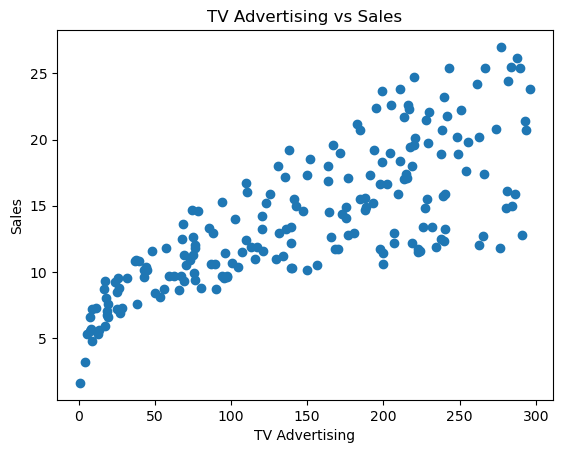

In [6]:
# Scatter Plot
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()


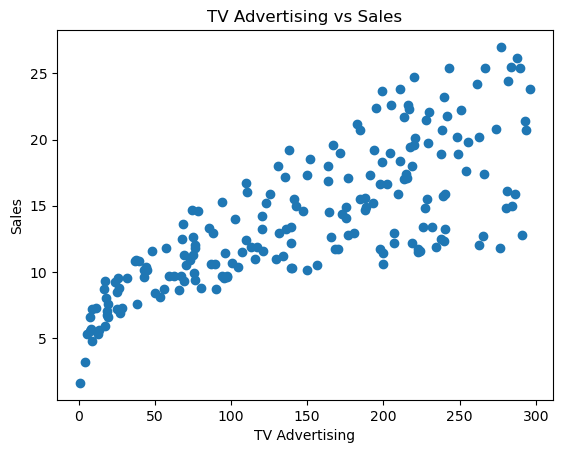

In [7]:
# Scatter Plot
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()


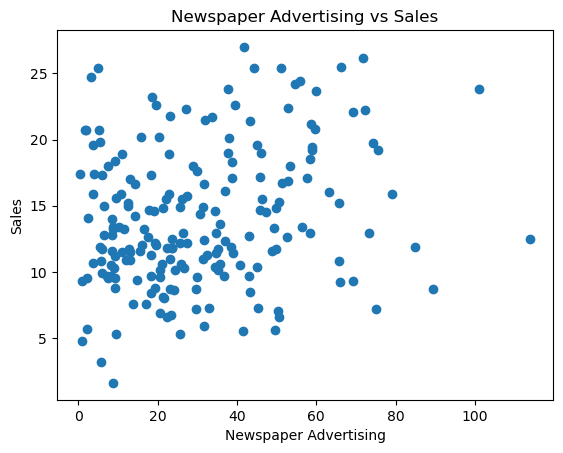

In [8]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs Sales')
plt.show()

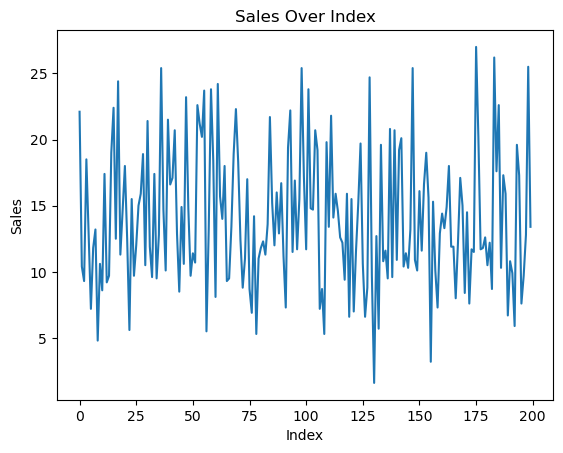

In [9]:
# Line Plot
plt.plot(df.index, df['Sales'])
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales Over Index')
plt.show()

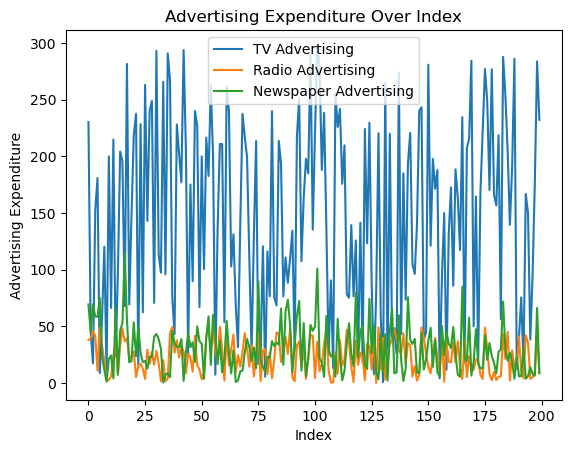

In [10]:
# Line Plot with Multiple Lines
plt.plot(df.index, df['TV'], label='TV Advertising')
plt.plot(df.index, df['Radio'], label='Radio Advertising')
plt.plot(df.index, df['Newspaper'], label='Newspaper Advertising')
plt.xlabel('Index')
plt.ylabel('Advertising Expenditure')
plt.title('Advertising Expenditure Over Index')
plt.legend()
plt.show()

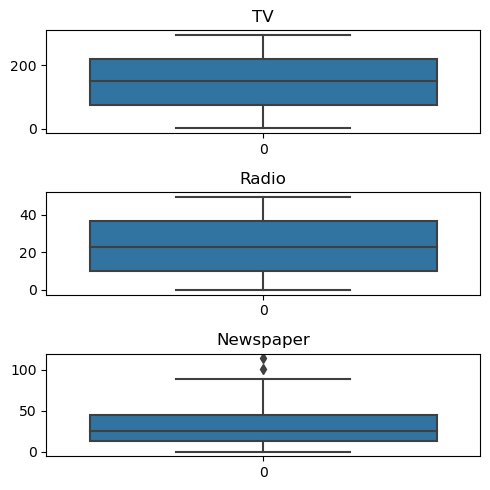

In [11]:
# Box Plot
fig, axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Radio'], ax=axs[1])
plt3=sns.boxplot(df['Newspaper'], ax=axs[2])
plt1.set_title('TV')
plt2.set_title('Radio')
plt3.set_title('Newspaper')
plt.tight_layout()

In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df=df.drop(columns=["Unnamed: 0"]) 

In [14]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
x=df.iloc[:,0:-1]

In [16]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y=df.iloc[:,-1]

In [18]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [20]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [21]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameter configuration
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 0.6578774652777781
R2 Score: 0.9771788235095732


# Decision tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 1.525
R2 Score: 0.9470991241002515


### 3 Linear regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 2.1365998027270834
R2 Score: 0.9258832780252507
